# Análisis de Rendimiento de Operadores de CallMeMaybe 

# Descomposición

__1. Descripción__

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia. 

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

__2. Objetivo__

Identificar operadores ineficaces para que los supervisores puedan tomar decisiones sobre la formación y gestión del personal a fin de mejorar la eficiencia operativa y la satisfacción del cliente.

__3. Tarea Principal__ 

Identificar operadores ineficaces basados en llamadas perdidas y tiempos de espera prolongados para llamadas entrantes, y baja cantidad de llamadas salientes.

__3.1 Condiciones de Ineficacia:__

Definir las condiciones que hacen a un operador ineficas, según la inormación proporcionada por CallMeMaybe.
- Alto número de llamadas entrantes perdidas
- Largo tiempo de espera para atender llamadas entrantes
- Bajo número de llamadas salientes

__3.2 Datos Necesarios:__

- Dataset de estadísticas de llamadas __`telecom_dataset_us.csv`__.
- Dataset de clientes y sus tarifas __`telecom_clients_us.csv`__.

__3.3 Detalles Específicos__

Observa de forma general y por tarifa:
- ¿Cúantas llamadas entrantes pierden los operadores?
- ¿Cuánto demoran en atender las llamadas entrantes?
- ¿Cuántas llamadas salientes realizan los operadores?
- ¿Qué tan eficaces resultan los operadores?
- ¿Cuáles y cuántos son los operadores menos eficaces?

- `¿Cuántos clientes hay por tarifa?`
- `¿Cómo crece mensualmente la clientela por tarifa?` 


__4. Planteamiento de Hipótesis__

- __Hipótesis 1:__ Los operadores ineficaces tienen la misma proporción de llamadas perdidas respecto a la media del total de llamadas perdidas.


- __Hipótesis 2:__ Los operadores poco eficaces demoran en atender llamadas entrantes lo mismo que la media del total de llamadas atendidas.


- __Hipótesis 3:__ Los operadores menos eficaces realizan la misma cantidad de llamadas salientes que la media general de llamadas que salen.

__4.1 Plan de Acción de hipótesis__

__Hipótesis 1:__ 

- Representar histogramas de distribución en ambos grupos de datos.
- Realizar test de contraste de hipótesis nula y alternativa.

__Hipótesis 2:__ 

- Representar histogramas de distribución en ambos grupos de datos.
- Realizar test de contraste de hipótesis nula y alternativa.


__Hipótesis 3:__ 

- Representar histogramas de distribución en ambos grupos de datos.
- Realizar test de contraste de hipótesis nula y alternativa.


__5. Preprocesamiento de datos__

- Estructurar datasets.
    - _Renombrar columnas._
    - _Estandarizar con snake_case._
    
- Estudiar y Gestionar el tipo de datos.
    - _Convertir tipos de datos adecuados._

- Estudiar y Gestionar valores ausentes.
- Estudiar y Gestionar valores duplicados.   
- Combinar datasets disponibles en uno solo.    
- Ingeniería de Características.
    - _Contar número de llamadas perdidas por operador._
    - _Promediar la demora de operadores para atender llamadas entrantes._
    - _Contar número de llamadas salientes de cada operador._
    - _Categorizar eficacia de operadores con valores de 0-1 según condiciones previas. Utilizar operaciones booleanas._

- Estudiar y Gestionar valores outliers.
- Contar número de operadores ineficaces y compararlos visualmente con el resto de operadores.
    


__6. Contraste de hipótesis__

Una vez preprocesados los datos e identificadas las hipótesis se procede a evaluarlas para determinar su significancia estadística. Es decir cómo se diferencian las métricas de los operadores poco eficaces de las métricas promedio del total de operadores.

__7. Conclusiones y Recomendaciones__

Mencionar puntos clave y resultados obtenidos, además de proporcionar sugerencias para la gestión de operadores para mejorar la eficiencia y experiencia de los clientes/usuarios.

## Importación de librerías

Se importan las librerías necesarias para el preprocesamiento y EDA

In [1]:
# Importación de librerías
import numpy as np  # Para operaciones numéricas y matrices
import pandas as pd  # Para manipulación de datos en DataFrames
import matplotlib.pyplot as plt  # Para visualización de gráficos
import seaborn as sns  # Para gráficos  más vistosos
from scipy import stats  # Para funciones estadísticas y pruebas 
from sklearn.preprocessing import MinMaxScaler # Para normalizar escalas

## Carga y lectura de datos

Se asignan los datasets a variables dataframes

In [2]:
# Obtener dataframes de llamadas y clientes
clients = pd.read_csv('telecom_clients_us.csv', sep=',')
calls = pd.read_csv('telecom_dataset_us.csv', sep=',')

In [3]:
display(calls.head()) # mostrar aspecto del df de llamadas
display(clients.head()) # mostrar aspecto del df de clientes

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


La columna 'tariff_plan' parece ser categórica. Se debe observar los valores que posee.

In [4]:
clients['tariff_plan'].value_counts() # observar los valores de la columa

tariff_plan
C    395
B    261
A     76
Name: count, dtype: int64

Tiene 3 posibles valores: A, B y C

## Preprocesamiento de Datos

### Inspeccionar estructura de datasets

In [5]:
calls.info() # mostrar información del df de llamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Las columnas 'internal' y 'operator_id' tienen valores ausentes. Las columnas tienen nombres en snake_case. 'internal' debe ser tipo bool y 'date'tipo fecha. Se debe inspeccionar también la existencia de duplicados

In [6]:
clients.info() # mostrar información del df de clientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


No existen valores ausentes, quizá solo tenga duplicados. Las columnas tienen nombres en snake_case. 'date_start'debe ser tipo fecha.

### Conversión de tipo

In [7]:
calls['internal'] = calls['internal'].astype('bool') # convertir a tipo bool
calls['date'] = pd.to_datetime(calls['date']).dt.tz_localize(None) # convertir a tipo fecha localizada
clients['date_start'] = pd.to_datetime(clients['date_start']) # convertir a tipo fecha

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53902 non-null  bool          
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.0+ MB


In [9]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


### Gestión de valores ausentes

In [10]:
calls[calls['internal'].isna()] # Observar valores NaN en la columna 'internal'

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration


117 registros tienen valores ausentes en la columna 'internal' De manera que no se sabe si son llamadas internas o externas. Afortunadamente solo representan el 0.22% del total. Por lo que se puede optar por eliminarlos.

In [11]:
calls.dropna(subset='internal', inplace=True) # Eliminar registros con valores NaN en la columna 'internal'
calls.info() # mostrar info de df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53902 non-null  bool          
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.0+ MB


Ahora queda inspeccionar los valores ausentes de 'operator_id'

In [12]:
calls[calls['operator_id'].isna()] # Observar valores NaN en la columna 'operator_id'

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
7,166377,2019-08-05,in,False,NaN,True,6,0,35
9,166377,2019-08-06,in,False,NaN,True,4,0,62
17,166377,2019-08-07,in,False,NaN,True,2,0,24
27,166377,2019-08-12,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27,in,False,NaN,True,2,0,39
53880,168601,2019-11-28,in,False,NaN,True,1,0,19
53889,168603,2019-11-28,in,False,NaN,True,1,0,30
53893,168606,2019-11-08,in,False,NaN,True,6,0,121


son más de 8000 registros que no tienen valor en 'operator_id' y seguramente se debe a que ningun operador pudo atender a tales clientes ya que no registra duración de atención pero sí de espera. Sin embargo, procede a verificar cuántas de esas llamadas registran más de '0' en 'call_duration' que son casos absurdos; una llamada no atendida no debería tender call_duration.

In [13]:
absurd_cases = calls[(calls['operator_id'].isna()) & (calls['call_duration']>0)] # Encontrar llamadas no atendidas pero que registran 'call_duration'
absurd_cases # mostrar segmento de dichas llamadas

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
698,166399,2019-08-12,in,False,NaN,False,1,10,55
704,166399,2019-09-02,in,False,NaN,False,1,68,115
4089,166503,2019-09-26,out,False,NaN,False,1,213,220
4136,166503,2019-10-09,in,False,NaN,False,1,374,405
4198,166503,2019-10-21,out,True,NaN,False,2,382,397
...,...,...,...,...,...,...,...,...,...
50930,168252,2019-11-28,in,True,NaN,False,2,265,274
50946,168252,2019-11-28,in,False,NaN,False,45,23765,23897
50955,168252,2019-11-28,out,False,NaN,False,22,11904,12211
50956,168252,2019-11-28,out,True,NaN,False,1,159,168


Son 122 llamadas no atendidas por ningún operador pero que registran un 'call_duration' mayor a '0'. Esto es una inconsistencia ya que no puede haber atención sin operador que conteste, y siendo una proporción de 122/53785 = 0.00226 (0.23%) se procede a eliminarlos del dataframe.

In [14]:
calls.drop(absurd_cases.index, inplace=True) # Eliminar llamadas no atendidas pero que registran 'call_duration'
calls.info() # verficiar eliminación 

<class 'pandas.core.frame.DataFrame'>
Index: 53780 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53780 non-null  int64         
 1   date                 53780 non-null  datetime64[ns]
 2   direction            53780 non-null  object        
 3   internal             53780 non-null  bool          
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53780 non-null  bool          
 6   calls_count          53780 non-null  int64         
 7   call_duration        53780 non-null  int64         
 8   total_call_duration  53780 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.4+ MB


Procede a verificar cuántas de las llamadas no atendidas fueron registradas como perdidas

In [15]:
calls[calls['operator_id'].isna()]['is_missed_call'].value_counts() # Contar llamadas no atendidas registradas como perdidas.

is_missed_call
True    8050
Name: count, dtype: int64

Todas las llamadas en efecto fueron registradas como perdidas. Los valores NaN entonces indican que en efecto no hubo operador que atendiera o realizara dichas llamadas

Se analiza también los siguientes casos absurdos:

- __Llamadas realizadas por operadores que ningún cliente contestó__ 
    
    direction=='out', is_missed_call==True, call_duration>0 (se supone que una llamada perdida dura nada '0')

- __Llamadas realizadas por clientes que ningún operador contestó__

    direction=='in', is_missed_call==True, call_duration>0 (se supone que una llamada perdida dura nada '0')

La condicional común se resume en:

    is_missed_call==True, call_duration>0

No se consideran escenarios absurdos los siguientes casos:
- __Llamadas realizadas por operadores que los clientes contestan pero duran nada__

    direction=='out', is_missed_call==False, call_duration==0 ()

- __Llamadas realizadas por clientes que los operadores contestan pero duran nada__

    direction=='in', is_missed_call==False, call_duration==0 

Ya que es válido que al contestar la llamada se cierre al instante por algún factor externo como falla técnica o clientes que cuelgan de inmediato.


Se procede a contabilizar los 2 casos absurdos mencionados

In [16]:
absurd_cases = calls[(calls['is_missed_call']==True) & (calls['call_duration']>0)] # Obtener casos absurdos de llamadas
absurd_cases['direction'].value_counts() # cuantificar casos absurdos

direction
in     301
out     24
Name: count, dtype: int64

- 301 llamadas realizadas por clientes que ningún operador contestó pero que curiosamente registran tiempo de atención.
- 24 llamadas realizadas por operadores que ningún cliente contestó pero que curiosamente registran tiempor de atención.

Estos registros de llamadas son absurdos y deberían eliminarse.

In [17]:
calls.drop(absurd_cases.index, inplace=True) # Eliminar casos absurdos
calls.info() # verificar eliminación

<class 'pandas.core.frame.DataFrame'>
Index: 53455 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53455 non-null  int64         
 1   date                 53455 non-null  datetime64[ns]
 2   direction            53455 non-null  object        
 3   internal             53455 non-null  bool          
 4   operator_id          45405 non-null  float64       
 5   is_missed_call       53455 non-null  bool          
 6   calls_count          53455 non-null  int64         
 7   call_duration        53455 non-null  int64         
 8   total_call_duration  53455 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.4+ MB


Quedan solamente las analizar llamadas donde ningún operador las atendió o que ningún operador realizó.

De aquí se deriva otro caso absurdo:
- Llamadas salientes del contact center que ningún operador realizó

    direction=='out', operator_id=NaN (Si ningún operador llama a nadie no puede haber llamada saliente)

In [18]:
absurd_cases = calls[(calls['operator_id'].isna()) & (calls['direction']=='out')] # Definir otro caso absurdo
len(absurd_cases) # cuantificar los casos

151

151 llamadas absurdos representa el 0.28% de los registros totales. Se puede eliminar del dataset.

In [19]:
calls.drop(absurd_cases.index, inplace=True) # Eliminar casos absurdos
calls.info() # verificar eliminación

<class 'pandas.core.frame.DataFrame'>
Index: 53304 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53304 non-null  int64         
 1   date                 53304 non-null  datetime64[ns]
 2   direction            53304 non-null  object        
 3   internal             53304 non-null  bool          
 4   operator_id          45405 non-null  float64       
 5   is_missed_call       53304 non-null  bool          
 6   calls_count          53304 non-null  int64         
 7   call_duration        53304 non-null  int64         
 8   total_call_duration  53304 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.4+ MB


In [20]:
calls[calls['operator_id'].isna()][['direction', 'is_missed_call', 'internal']].value_counts() # cuantificar los casos de llamadas entrantes

direction  is_missed_call  internal
in         True            False       7536
                           True         363
Name: count, dtype: int64

Léase _llamadas entrantes (realizadas por clientes al contact center) que se perdieron:_

- Si son externas quiere decir que no se realizan entre operadores
- Si son internas quiere decir que las relaizan entre operadores (Caso absurdo)

¿363 llamadas entrantes (realizadas por un cliente) se perdieron pero fueron internas (realizadas entre operadores)? No tiene sentido, deberían eliminarse del registro.

In [21]:
absurd_cases = calls[(calls['operator_id'].isna()) & (calls['internal']==True)] # definir otro caso absurdo
absurd_cases

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
572,166391,2019-08-06,in,True,NaN,True,3,0,163
579,166391,2019-08-10,in,True,NaN,True,1,0,38
580,166391,2019-08-15,in,True,NaN,True,2,0,77
581,166391,2019-08-16,in,True,NaN,True,3,0,67
635,166392,2019-10-07,in,True,NaN,True,1,0,26
...,...,...,...,...,...,...,...,...,...
52621,168361,2019-11-14,in,True,NaN,True,1,0,2
53149,168366,2019-11-01,in,True,NaN,True,3,0,26
53614,168466,2019-11-14,in,True,NaN,True,1,0,0
53661,168481,2019-11-11,in,True,NaN,True,4,0,25


In [22]:
calls.drop(absurd_cases.index, inplace=True) # Eliminar casos absurdos
calls.info() # verificar eliminación

<class 'pandas.core.frame.DataFrame'>
Index: 52941 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              52941 non-null  int64         
 1   date                 52941 non-null  datetime64[ns]
 2   direction            52941 non-null  object        
 3   internal             52941 non-null  bool          
 4   operator_id          45405 non-null  float64       
 5   is_missed_call       52941 non-null  bool          
 6   calls_count          52941 non-null  int64         
 7   call_duration        52941 non-null  int64         
 8   total_call_duration  52941 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.3+ MB


Ahora solo quedan las llamadas entrantes (realizadas por clientes al contact center) que se perdieron y evidentemente no fueron realizadas entre los operadores. Estos valores ausentes son representativos y no deben ser eliminados, por lo que se puede optar por reemplazarlos por algún valor distintivo. Observemos el rango de valores el la columna 'operator_id'

In [23]:
calls['operator_id'].agg({'min', 'max'}) # obtener rango de valores de operator_id

min    879896.0
max    973286.0
Name: operator_id, dtype: float64

Los valores de 'operator_id' van de (879896-973286). Los NaN pueden reemplazarse representativamente con 0 en alusión a ningún operador.

In [24]:
calls['operator_id'].fillna(0, inplace=True) # Reemplazar valores ausentes por cero
calls.info() # verificar reemplazo.

<class 'pandas.core.frame.DataFrame'>
Index: 52941 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              52941 non-null  int64         
 1   date                 52941 non-null  datetime64[ns]
 2   direction            52941 non-null  object        
 3   internal             52941 non-null  bool          
 4   operator_id          52941 non-null  float64       
 5   is_missed_call       52941 non-null  bool          
 6   calls_count          52941 non-null  int64         
 7   call_duration        52941 non-null  int64         
 8   total_call_duration  52941 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.3+ MB


C:\Users\UserPC\AppData\Local\Temp\ipykernel_5040\684924867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calls['operator_id'].fillna(0, inplace=True) # Reemplazar valores ausentes por cero


Ahora ya no existen valores ausentes en el dataframe calls. Respecto a la cantidad inicial de 53902, al final se eliminó solo el 1.78% de datos, por lo que no se apreciará sesgo en los resultados procesados.

### Gestión de duplicados

Procede a observar las duplicidades en los registros de llamadas e interpretar su signficado.

In [25]:
calls[calls.duplicated()].value_counts()#cuantificar registros duplicados

user_id  date        direction  internal  operator_id  is_missed_call  calls_count  call_duration  total_call_duration
166377   2019-08-05  out        False     880020.0     True            8            0              50                     1
167580   2019-11-08  out        True      937362.0     False           1            67             73                     1
                                False     937156.0     False           1            60             64                     1
         2019-11-07  out        False     936382.0     True            12           0              332                    1
         2019-11-06  out        False     937368.0     True            1            0              32                     1
                                                                                                                         ..
166973   2019-09-17  in         False     901586.0     False           3            202            230                    1
         2019

Son 4821 registros duplicados pertenecientes a registros unívocos, es decir 4821 registros fueron duplicados una sola vez. 

Podría fácilmente eliminarse estos duplicados o bien tomar beneficio de la duda de que se realizaron llamadas con los mismos parámetros el mismo día pero a diferentes horas del día, aunque el campo de fecha no ofrece precisión horaria sino diaria; por lo que una medida conservadora sería priorizar determinados registros de llamadas según las condiciones para medir ineficacia, de manera que los duplicados a conservar serían aquellos donde las llamadas no se pierden, es decir borrar duplicados donde is_missed_call=False ya que al borrar duplicados de llamadas perdidas implicaría reducir la ineficacia de operadores, pero el objetivo es detectar más claramente la ineficacia para reforzar falencias.


In [26]:
#cuantificar registros duplicados de llamadas no perdidas
duplicates = calls[(calls.duplicated()) & (calls['is_missed_call']==False)]
len(duplicates) # mostrar número de duplicados a borrar

2776

resulta más conservador borrar 2776 registros duplicados que 4821.

In [27]:
calls.drop(duplicates.index, inplace=True) # eliminar los 2776 duplicados
calls.info() # verificar eliminación

<class 'pandas.core.frame.DataFrame'>
Index: 50165 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              50165 non-null  int64         
 1   date                 50165 non-null  datetime64[ns]
 2   direction            50165 non-null  object        
 3   internal             50165 non-null  bool          
 4   operator_id          50165 non-null  float64       
 5   is_missed_call       50165 non-null  bool          
 6   calls_count          50165 non-null  int64         
 7   call_duration        50165 non-null  int64         
 8   total_call_duration  50165 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.2+ MB


De esta manera se mejora la sensibilidad para detectar operadores indeficaces. Quedando 50165 registros, solo se ha eliminado un 6.9% de datos, una proporción lo suficientemente conservadora para no sesgar significativamente el dataset original.

### Combinar datasets

Se procede a fusionar los datasets 'calls' y 'clients' en uno solo para tener acceso a información de llamadas y detalles de los clientes.

In [28]:
calls_full = pd.merge(calls, clients, on='user_id', how='left') # fusionar prioridzando llamadas registradas
calls_full # mostrar el df 

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,0.0,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
50160,168606,2019-11-10,out,True,957922.0,False,1,0,25,C,2019-10-31
50161,168606,2019-11-10,out,True,957922.0,True,1,0,38,C,2019-10-31
50162,168606,2019-11-11,out,True,957922.0,False,2,479,501,C,2019-10-31
50163,168606,2019-11-15,out,True,957922.0,False,4,3130,3190,C,2019-10-31


In [29]:
calls_full.groupby('operator_id')['user_id'].nunique() # a cuántos clientes llaman los operadores.

operator_id
0.0         303
879896.0      1
879898.0      1
880020.0      1
880022.0      1
           ... 
972410.0      1
972412.0      1
972460.0      1
973120.0      1
973286.0      1
Name: user_id, Length: 1093, dtype: int64

practicamente existe un operador por cada cliente.

### Ingeniería de Características

Se procede a enriquecer el dataset con las siguientes características:

 - _Contar número de llamadas perdidas por operador._
- _Promediar la demora de operadores para atender llamadas entrantes._
- _Contar número de llamadas salientes de cada operador._
- _Categorizar eficacia de operadores con valores de 0-1 según condiciones previas. Utilizar operaciones booleanas._

In [30]:
calls_full['waiting_duration'] = calls_full['total_call_duration'] - calls_full['call_duration']

In [31]:
# Definir diccionario de agregación
aggregate = {'is_missed_call':'sum', 'waiting_duration':'mean', 'calls_count':'sum'}

# agrupar y obtener estadísticas de eficacia previamente definidas
operators_performance = calls_full.groupby(['operator_id', 'direction', 'tariff_plan']).agg(aggregate)
operators_performance.columns = ['num_missed_calls_in', 'avg_waiting_time_in', 'num_calls_out'] # renombrar columnas
operators_performance = operators_performance.reset_index(['direction', 'tariff_plan']) 
operators_performance # mostrar df de rendimiento general

,direction,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out
operator_id,,,,,
0.0,in,A,1203,364.862012,62687
0.0,in,B,2867,163.650855,26556
0.0,in,C,3466,125.039238,22052
879896.0,in,B,0,27.333333,58
879896.0,out,B,50,118.363636,876
...,...,...,...,...,...
972412.0,out,B,2,256.250000,60
972460.0,in,C,0,4.000000,1
972460.0,out,C,3,102.666667,50


Recordar las condiciones que definen ineficacia de operadores:
- Alto número de llamadas entrantes perdidas
- Largo tiempo de espera para atender llamadas entrantes
- Bajo número de llamadas salientes

In [32]:
# Número de llamadas entrantes perdidas y demoradas de atender
in_missed_delayed_calls = operators_performance[operators_performance['direction']=='in'].iloc[:,:-1]
in_missed_delayed_calls.drop('direction', axis=1, inplace=True)
out_num_calls = operators_performance[operators_performance['direction']=='out']['num_calls_out']

report = pd.merge(in_missed_delayed_calls, out_num_calls, on = 'operator_id', how='outer').reset_index()
report

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out
0,0.0,A,1203.0,364.862012,NaN
1,0.0,B,2867.0,163.650855,NaN
2,0.0,C,3466.0,125.039238,NaN
3,879896.0,B,0.0,27.333333,876.0
4,879898.0,B,0.0,29.473684,7443.0
...,...,...,...,...,...
1090,972410.0,NaN,NaN,NaN,77.0
1091,972412.0,B,0.0,25.000000,60.0
1092,972460.0,C,0.0,4.000000,50.0
1093,973120.0,NaN,NaN,NaN,3.0


interpretación:

- Los valores NaN en 'tariff_plan' indican que las llamadas no pertenecen a un plan específico.

        Reemplazar con 'other' sería más representativo.

- Los valores NaN en 'num_missed_calls(in)' indican que el operador nunca le llegaron llamadas entrantes.

        Reemplazar con 0 sería un fallo injusto al operador, no hay culpa si no lo llaman.
    
- Los valores NaN en 'avg_waiting_time(in)' indican que el operador no demoró en atender llamadas entrantes que nunca llegaron.
        
        Reemplazar con cualquier valor sería un fallo injusto al operador, un '0' lo beneficia y un número alto lo perjudica. Esta métrica depende de la anterior.

- Los valores NaN en 'num_calls(out)' indican que el operador no realizó llamadas salientes.

        Realizar llamadas a clientes es obligación del operador, se puede reemplazar con '0'.



In [33]:
report['tariff_plan'] = report['tariff_plan'].fillna('other') # Reemplazar valores NaN 
report['num_calls_out'] = report['num_calls_out'].fillna(0).round(0) # Reemplazar valores NaN 

Construcción lógica para evaluar el cumplimiento del operador:

- __A:__ num_missed_calls(in) < avg_a
- __B:__ avg_waiting_time(in) < avg_b
- __C:__ num_calls(out) > avg_c 
- __Z:__ 1 = Cumple; 0 = No cumple

$$A \land B \land C \to Z$$

El operador es eficaz si cumple con las 3 condiciones simultaneamente: 

`perder pocas llamadas entrantes, atender rápido y llamar a suficientes clientes.`

Los umbrales AVG se definen por el valor medio de cada campo en el df `report`

In [34]:
avg_a, avg_b, avg_c = report[['num_missed_calls_in', 'avg_waiting_time_in', 'num_calls_out']].mean()
print(avg_a, avg_b, avg_c) # Mostrar valores medios que representan umbrales de ineficacia

10.554232804232804 59.75957555090574 580.3497716894977


- En promedio se pierden 10.55 llamadas entrantes por operador
- En promedio los operadores se tarden 60 segundos en antender a los clientes
- En promedio los operadores realizan 580 llamadas a clientes.

In [35]:
# Crear columna task_achieve para definir el cumplimiento de tareas del operador
report['complete_tasks'] = (
    (report['num_missed_calls_in'] < avg_a) |
    (report['avg_waiting_time_in'] < avg_b) |
    (report['num_calls_out'] > avg_c)
)
report

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,complete_tasks
0,0.0,A,1203.0,364.862012,0.0,False
1,0.0,B,2867.0,163.650855,0.0,False
2,0.0,C,3466.0,125.039238,0.0,False
3,879896.0,B,0.0,27.333333,876.0,True
4,879898.0,B,0.0,29.473684,7443.0,True
...,...,...,...,...,...,...
1090,972410.0,other,NaN,NaN,77.0,False
1091,972412.0,B,0.0,25.000000,60.0,True
1092,972460.0,C,0.0,4.000000,50.0,True
1093,973120.0,other,NaN,NaN,3.0,False


Ahora para definir la proporción de eficacia 'effective_rate' se procede a normalizar las métricas de ineficacia y se las pondera para obtener valores de 0 a 1. La ponderación de importancia se describe a continuación:

- __No perder llamadas entrantes__  
peso: Alto

    Las llamadas entrantes a menudo representan clientes que necesitan asistencia o desean hacer una compra. Perder estas llamadas puede resultar en una experiencia negativa para el cliente y potencialmente en la pérdida de negocios. Su caracter es urgente.

- __No hacer esperar mucho a clientes que llaman__  
peso: Medio-alto

    Un tiempo de espera prolongado puede causar frustración en los clientes, afectando negativamente su experiencia y satisfacción. Esto es crucial para mantener altos niveles de satisfacción y lealtad del cliente.

- __No hacer esperar mucho a clientes que llaman__  
peso: Medio-bajo

    Las llamadas salientes pueden ser importantes para realizar ventas, seguimientos y campañas de marketing. Sin embargo, su importancia puede ser secundaria en comparación con la atención inmediata a las llamadas entrantes.

Por lo tanto por convención se definen los siguientes pesos:

- A (num_missed_calls(in) > avg_a): 0.4
- B (avg_waiting_time(in) > avg_b): 0.4
- C (num_calls(out) < avg_c): 0.2

In [36]:
scaler = MinMaxScaler() # Normalizar las columnas

w_a, w_b, w_c = [0.4, 0.4, 0.2] # definir pesos de pponderación

# Crear columna de performance que mide el rendimiento general del operador.
report['performance'] = (
    w_a * (1 - scaler.fit_transform(report[['num_missed_calls_in']])) +
     w_b * (1 - scaler.fit_transform(report[['avg_waiting_time_in']])) +
     w_c * scaler.fit_transform(report[['num_calls_out']])
    ).round(2)

report['avg_waiting_time_in'] = report['avg_waiting_time_in'].round(2)
report['num_calls_out'] = report['num_calls_out'].astype('int64')
report['operator_id'] = report['operator_id'].astype('int64')

report.sort_values('performance', ascending=False) # ordenar de forma descendente el performance

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,complete_tasks,performance
31,885876,A,15.0,102.50,62491,True,0.96
32,885890,A,16.0,126.45,61310,True,0.94
554,925922,A,4.0,120.96,20367,True,0.82
4,879898,B,0.0,29.47,7443,True,0.81
8,880028,B,0.0,8.37,2614,True,0.81
...,...,...,...,...,...,...,...
1084,970484,other,NaN,NaN,7,False,NaN
1085,970486,other,NaN,NaN,6,False,NaN
1089,972408,other,NaN,NaN,8,False,NaN
1090,972410,other,NaN,NaN,77,False,NaN


__GRaficos__

`Trazar histogramas de num_missed_calls, avg_waiting_time_in, num_calls_out`

`Trazar barplot de complete_tasks`

`trazar histogrma performance por complete_tasks`

`correlacion de tareas basicas con complete_tasks y performance`
__________________________________________________________________________________________



Basta que el operador cumpla las 3 tareas básicas para ser eficaz, pero el alto rendimiento permite identificar a los mejores.

Puede darse el caso de no cumplir las 3 tareas a la vez pero su rendimiento puede revelar su potencial.

Observemos entonces a los 10 mejores operadores y a los que requieren mejorar pero tienen potencial.

In [37]:
report[report['complete_tasks']==True].sort_values('performance', ascending=False).head(10)

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,complete_tasks,performance
31,885876,A,15.0,102.50,62491,True,0.96
32,885890,A,16.0,126.45,61310,True,0.94
554,925922,A,4.0,120.96,20367,True,0.82
4,879898,B,0.0,29.47,7443,True,0.81
8,880028,B,0.0,8.37,2614,True,0.81
720,937880,A,0.0,13.00,0,True,0.80
766,940430,A,0.0,2.50,27,True,0.80
202,901584,C,0.0,14.50,176,True,0.80
203,901586,C,0.0,11.63,96,True,0.80
204,901588,C,0.0,8.74,55,True,0.80


Los 10 mejores operadores cumplen las 3 tareas y tienen un rendimiento de 80% en adelante

In [38]:
report[report['complete_tasks']==True].sort_values('performance', ascending=True).head()

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,complete_tasks,performance
471,919794,B,1.0,1007.38,21,True,0.40
271,906070,C,1.0,946.64,89,True,0.42
469,919790,B,0.0,866.80,23,True,0.46
616,931458,C,9.0,694.82,2379,True,0.53
272,906076,C,0.0,611.50,1,True,0.56


El rendimiento más bajo observado en operadores eficaces es del 40%. Tiene bastante margen de mejora al igual que sus próximos. De cualquier manera, estos operadores son buenos trabajadores.

In [39]:
report[report['complete_tasks']==False].sort_values('performance', ascending=False)

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,complete_tasks,performance
822,944216,B,17.0,157.43,133,False,0.74
824,944220,B,13.0,186.10,222,False,0.73
826,944226,B,14.0,165.06,111,False,0.73
371,913938,B,13.0,526.94,411,False,0.59
0,0,A,1203.0,364.86,0,False,0.52
...,...,...,...,...,...,...,...
1084,970484,other,NaN,NaN,7,False,NaN
1085,970486,other,NaN,NaN,6,False,NaN
1089,972408,other,NaN,NaN,8,False,NaN
1090,972410,other,NaN,NaN,77,False,NaN


- Solo 3 operadores tienen buen rendimiento (arriba del 70%), pero están desbalanceados en el cumplimiento de tareas, destacan en unas y flaquean en otras. Les falta poco para ser eficaces y superarán repentinamente a otros operadores que ya son cumplidos pero que tienen un rendimiento moderado.

- 1 operador no cumple con todo pero tiene un rendimiento de 59%. Sin duda puede mejorar.


In [40]:
report[report['complete_tasks']==False].sort_values('performance', ascending=True)

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,complete_tasks,performance
2,0,C,3466.0,125.04,0,False,0.35
1,0,B,2867.0,163.65,0,False,0.40
0,0,A,1203.0,364.86,0,False,0.52
371,913938,B,13.0,526.94,411,False,0.59
824,944220,B,13.0,186.10,222,False,0.73
...,...,...,...,...,...,...,...
1084,970484,other,NaN,NaN,7,False,NaN
1085,970486,other,NaN,NaN,6,False,NaN
1089,972408,other,NaN,NaN,8,False,NaN
1090,972410,other,NaN,NaN,77,False,NaN



- 1 operador no cumple y apenas rinde un 35%. Definitivamente requiere entrenamiento.

- El resto de este grupo de operadores aun no ha recibido sus primeras llamadas, solo ha llamado a clientes. Pueden ser nuevos o estar en capacitación inicial. Se debe observar su su progreso en el tiempo.


In [41]:
report[report['complete_tasks']==False].sort_values('num_calls_out', ascending=False)

,operator_id,tariff_plan,num_missed_calls_in,avg_waiting_time_in,num_calls_out,complete_tasks,performance
70,891154,other,NaN,NaN,547,False,NaN
905,947652,other,NaN,NaN,538,False,NaN
899,947640,other,NaN,NaN,487,False,NaN
1053,965538,other,NaN,NaN,475,False,NaN
735,938072,other,NaN,NaN,472,False,NaN
...,...,...,...,...,...,...,...
1030,960666,other,NaN,NaN,1,False,NaN
418,917890,other,NaN,NaN,1,False,NaN
1,0,B,2867.0,163.65,0,False,0.40
2,0,C,3466.0,125.04,0,False,0.35


236 operadores no reciben llamadas, por consiguiente no pueden atender ninguna y realizan menos de la media de llamadas a clientes. Estos operadores, así sean nuevos no consiguen cumplir con las dos tareas de mayor importancia, no puedan aportar lo suficente a la empresa y quizas no puedan seguir colaborando ya que estarián resultando caros para CallMeMaybe.

Con histogramas se descubrirá más detalle de los operadores menos eficaces.

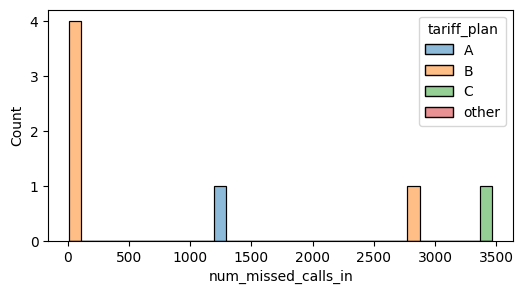

,Bin Range,Frequency
0,13.00 to 19.91,4
172,1200.83 to 1207.74,1
413,2865.18 to 2872.08,1
499,3459.09 to 3466.00,1


In [139]:
# Trazar histograma de número de llamadas entrantes perdidas por operadores ineficaces
plt.figure(figsize=(6,3))
sns.histplot(data=report[report['complete_tasks']==False], x='num_missed_calls_in', bins=35, hue='tariff_plan')
plt.show()

counts, bin_edges = np.histogram(report[mask]['num_missed_calls_in'], bins=500)  # Calcula los histogramas con 30 bins
bin_ranges = [f'{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
histogram_table = pd.DataFrame({'Bin Range': bin_ranges, 'Frequency': counts})
histogram_table[histogram_table['Frequency']>0].head()

De los operadores ineficaces, existen 4 que han perdido hasta 17 llamadas de clientes de la tarifa B, 1 que perdió cerca de 1205 llamadas de clientes de la tariba A, otro operador perdió 2870 llamadas de la tarifa B y otro que no atendió 3463 llamadas de clientes de la tarifa C. Estos 3 últimos operadores son desconocidos o quizá inexistentes. Todos perdieron más de la media de 10.58 llamadas.

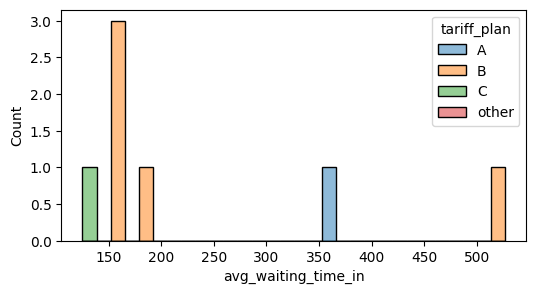

,Bin Range,Frequency
0,125.04 to 133.08,1
4,157.19 to 165.23,3
7,181.31 to 189.34,1
29,358.14 to 366.18,1
49,518.90 to 526.94,1


In [142]:
# Trazar histograma de tiempo de espera de llamadas entrantes por operadores ineficaces
plt.figure(figsize=(6,3))
sns.histplot(data=report[report['complete_tasks']==False], x='avg_waiting_time_in', bins=30, hue='tariff_plan')
plt.show()

counts, bin_edges = np.histogram(report[mask]['avg_waiting_time_in'], bins=50)  # Calcula los histogramas con 30 bins
bin_ranges = [f'{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
histogram_table = pd.DataFrame({'Bin Range': bin_ranges, 'Frequency': counts})
histogram_table[histogram_table['Frequency']>0].head()

1 operador ineficaz hizo esperar carca de 130 segundos a un cliente del plan C, 4 operadores tardaron entre 157-190 segundos en atender a clientes de la tarifa B, otro operador se demoró 362 segundos en atender a un cliente del plan A y otro más de 523 segundos en contestar a un cliente del plan B. Todos se demoraron más de la media de 60 segundos.

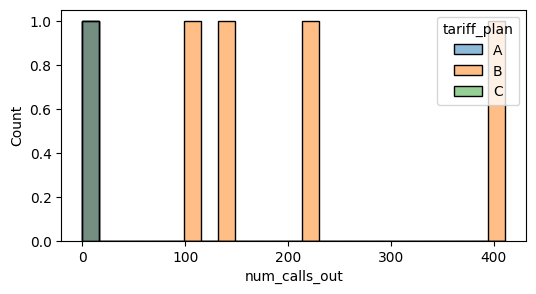

,Bin Range,Frequency
0,0.00 to 1.37,3
81,110.97 to 112.34,1
97,132.89 to 134.26,1
162,221.94 to 223.31,1
299,409.63 to 411.00,1


In [145]:
# Trazar histograma de llamadas salientes por operadores ineficaces parte 1
mask = (report['complete_tasks']==False) & (report['tariff_plan']!='other')
plt.figure(figsize=(6,3))
sns.histplot(data=report[mask], x='num_calls_out', bins=25, hue='tariff_plan')
plt.show()

counts, bin_edges = np.histogram(report[mask]['num_calls_out'], bins=300)  # Calcula los histogramas con 30 bins
bin_ranges = [f'{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
histogram_table = pd.DataFrame({'Bin Range': bin_ranges, 'Frequency': counts})
histogram_table[histogram_table['Frequency']>0].head()

3 operadores ineficaces realizarón una llamada a clientes de los planes A, B, C respectivamente. 4 operadores llamaron a clientes del plan B una respectiva cantidad de 111, 133, 222 y 410 veces, lo cual es menos que la media de 580 llamadas.

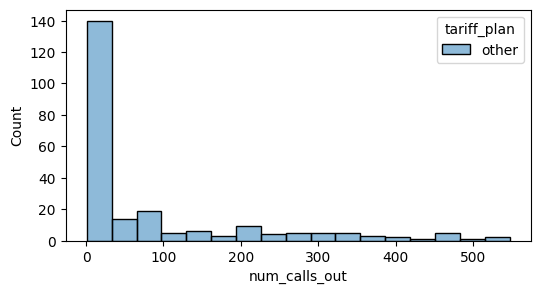

,Bin Range,Frequency
0,1.00 to 33.12,140
1,33.12 to 65.24,14
2,65.24 to 97.35,19


,Bin Range,Frequency
14,450.65 to 482.76,5
15,482.76 to 514.88,1
16,514.88 to 547.00,2


In [147]:

# Trazar histograma de llamadas salientes por operadores ineficaces parte 2
mask = (report['complete_tasks']==False) & (report['tariff_plan']=='other')
plt.figure(figsize=(6,3))
sns.histplot(data=report[mask], x='num_calls_out', bins=17, hue='tariff_plan')

plt.show()

report[mask].groupby('num_calls_out').size()

counts, bin_edges = np.histogram(report[mask]['num_calls_out'], bins=17)  # Calcula los histogramas con 30 bins
bin_ranges = [f'{bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]
histogram_table = pd.DataFrame({'Bin Range': bin_ranges, 'Frequency': counts})
display(histogram_table.iloc[:3])  # Muestra las primeras tres filas
display(histogram_table.iloc[-3:])  # Muestra las últimas tres filas

Aproximadamente 140 operadores ineficaces realizaron hasta 33 llamadas y 33 operadores realizaron entre 33 y 97 llamadas. Solo 2 operadores llamaron hasta 547 veces, pero sigue debajo de la media de 580.

## Fuentes

A continuación se muestra la documentación utilizada para trabajar el proyecto:

- __Tripleten Sprint 3 - Manipulación de datos__
    
    Guía práctica de cómo realizar paso a paso data wrangling. Permite hacer el respectivo preprocesamiento de datos para preparar los datos del proyecto de telecomunicaciones.
    https://tripleten.com/trainer/data-analyst/lesson/66c18ebf-bde5-474f-b9d0-d1b4f668f44f/?from=program


- __Tripleten Sprint 4 - Prueba de hipótesis__

    Guía práctica de cómo realizar una prueba de hipótesis. Permite comparar los operadores ineficaces con el conjunto global de operadores. https://tripleten.com/trainer/data-analyst/lesson/d86b0407-a5aa-407b-83be-6d6094f8b8b4/?from=program
    
    
- __Preprocesamiento de Datos__

    Cómo Preprocesar Datos en Python: Artículo en Built In que ofrece un tutorial paso a paso sobre la implementación del preprocesamiento de datos utilizando Python, NumPy y Pandas. Permite preparar los datos de la compañia de telecomunicaciones para utilizarlos en visualización de resultados y contraste de hipótesis. https://builtin.com/machine-learning/how-to-preprocess-data-python
    

- __Ingeniería de Características__

    Feature Engineering | Python Data Science Handbook: En esta sección del libro Python Data Science Handbook, se cubren ejemplos comunes de tareas de ingeniería de características, como representación de datos categóricos, texto e imágenes, así como la creación de características derivadas para aumentar la complejidad del modelo. La ingeniería de características permite enriquecer el dataset y responder algunas de las preguntas específicas previamente formuladas. https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html 


- __Graficación en Python__

    Python Data Visualization Tutorial: Video que enseña cómo usar las bibliotecas de visualización de datos en Python, como Matplotlib, Seaborn para crear diferentes tipos de gráficos y visualizaciones útiles para el proyecto de telecomunicaciones. https://www.youtube.com/watch?v=Nt84_TzRkbo
    
    Data Visualization | Data Visualization Python: Video que explica cómo usar Seaborn para crear gráficos estadísticos y visualizar datos. https://www.youtube.com/watch?v=_YWwU-gJI5U
    

In [45]:
print('hello there man')

hello there man


In [46]:
import pandas as pd